In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('diabetes.csv')

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

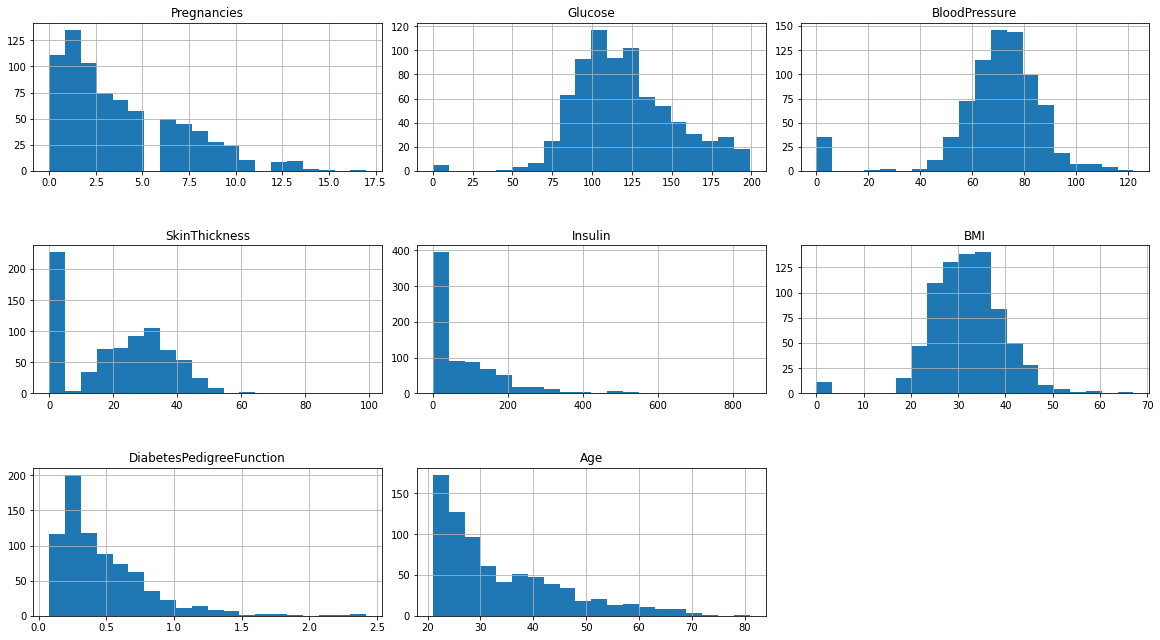

In [ ]:
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

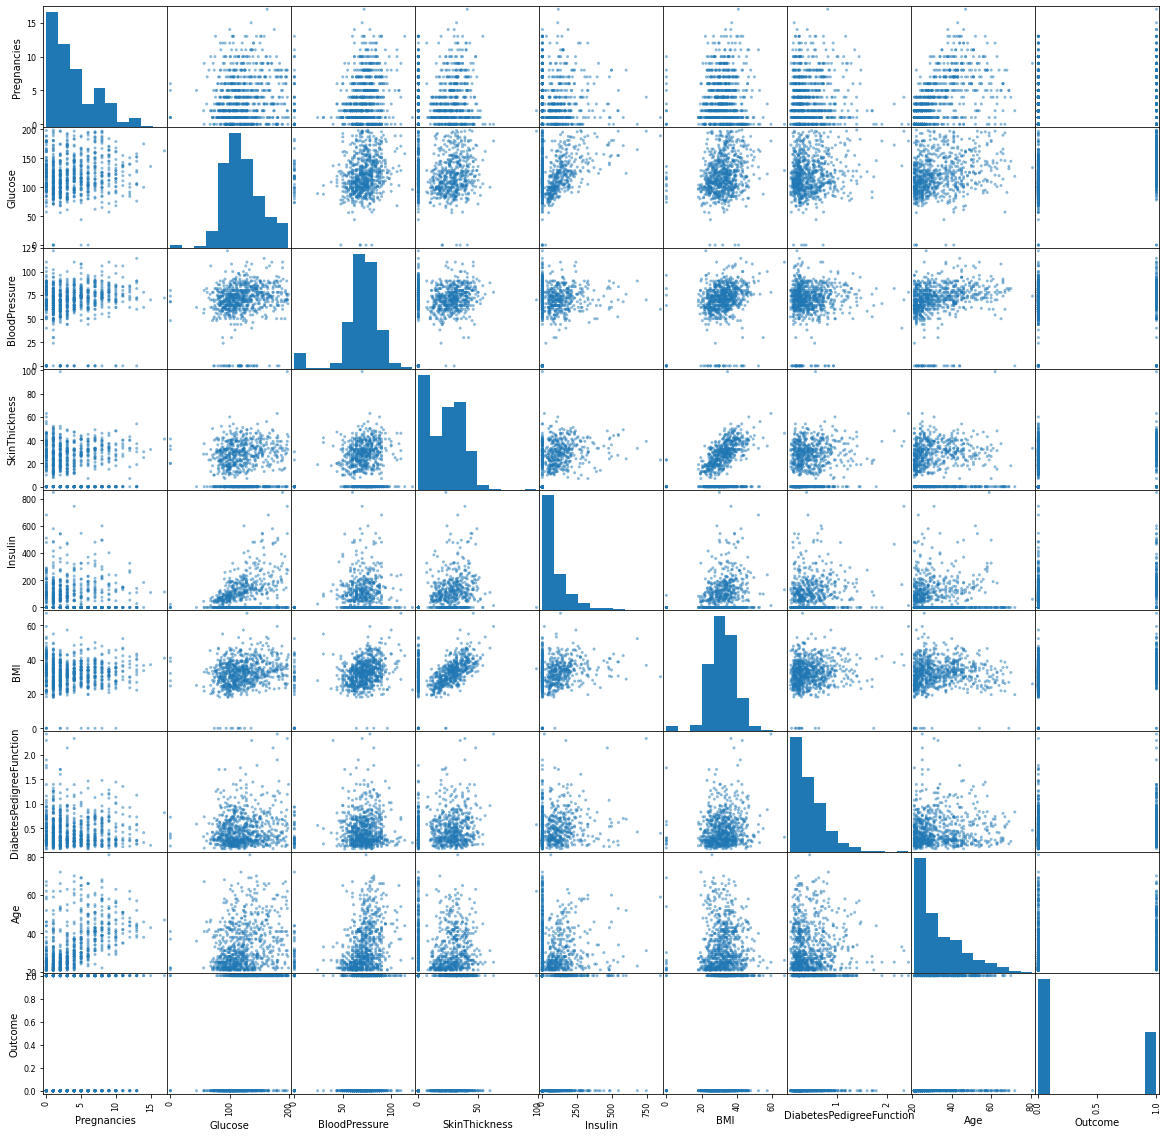

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataset, figsize = (20, 20));

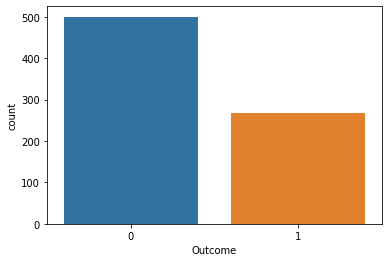

In [ ]:
sns.countplot(x = 'Outcome',data = dataset)


In [ ]:
corr = dataset.corr()
corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


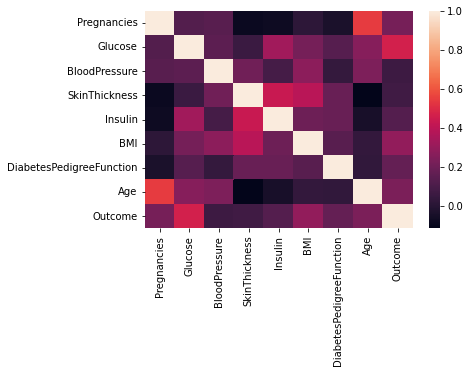

In [ ]:
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [ ]:
dataset_copy = dataset.copy(deep = True)
dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


print(dataset_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
dataset_copy['Glucose'].fillna(dataset_copy['Glucose'].mean(), inplace = True)
dataset_copy['BloodPressure'].fillna(dataset_copy['BloodPressure'].mean(), inplace = True)
dataset_copy['SkinThickness'].fillna(dataset_copy['SkinThickness'].median(), inplace = True)
dataset_copy['Insulin'].fillna(dataset_copy['Insulin'].median(), inplace = True)
dataset_copy['BMI'].fillna(dataset_copy['BMI'].median(), inplace = True)

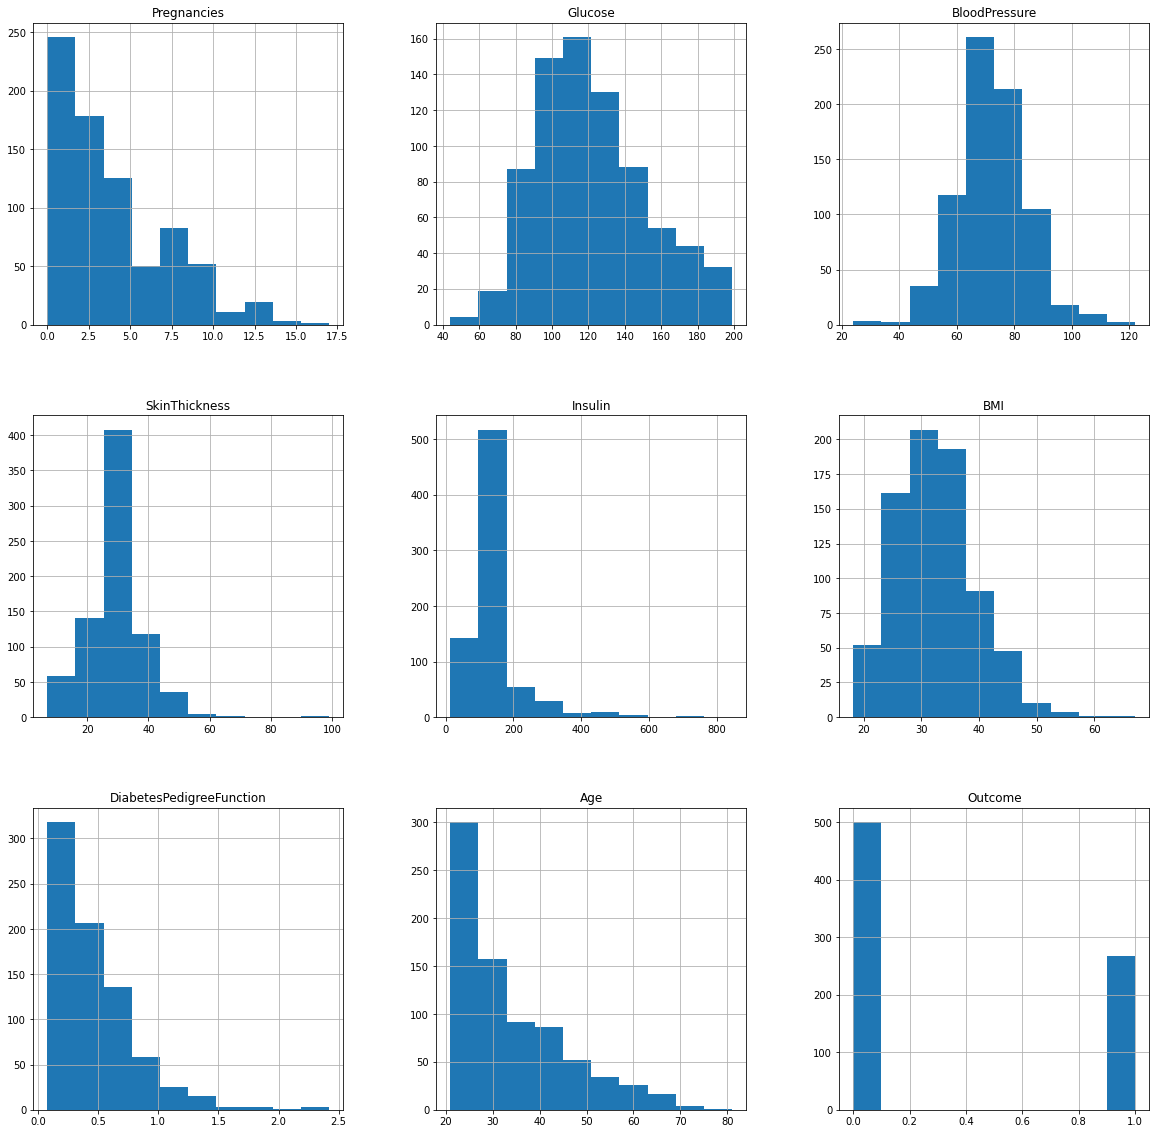

In [ ]:
p = dataset_copy.hist(figsize = (20,20))


In [ ]:
dataset_copy.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(dataset_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
y = dataset_copy.Outcome

In [ ]:
Y = dataset['Outcome']
X = dataset.drop('Outcome', axis=1)


In [ ]:
#X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
#Y = dataset_scaled.iloc[:, 8].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33,
                                                    random_state=7)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import metrics

predictions_dtree = dtree.predict(X_test)
print("**** Decision Tree ****")
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions_dtree)))
print("Precision Score =",format(metrics.precision_score(y_test,predictions_dtree)))
print("Recall Score =", format(metrics.recall_score(y_test,predictions_dtree)))
print("F1 Score =", format(metrics.f1_score(y_test,predictions_dtree)))

**** Decision Tree ****
Accuracy Score = 0.7165354330708661
Precision Score = 0.6162790697674418
Recall Score = 0.5760869565217391
F1 Score = 0.5955056179775282


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)


In [ ]:
rfc_model.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
rfc_model.fit(X_test,y_test)
print("**** Random Forest ****")
predictions_rfc = rfc_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions_rfc)))
print("Precision Score =",format(metrics.precision_score(y_test,predictions_rfc)))
print("Recall Score =", format(metrics.recall_score(y_test,predictions_rfc)))
print("F1 Score =", format(metrics.f1_score(y_test,predictions_rfc)))

**** Random Forest ****
Accuracy Score = 0.9803149606299213
Precision Score = 1.0
Recall Score = 0.9456521739130435
F1 Score = 0.9720670391061452


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions_rfc))
print(classification_report(y_test,predictions_rfc))

[[162   0]
 [  5  87]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       162
           1       1.00      0.95      0.97        92

    accuracy                           0.98       254
   macro avg       0.99      0.97      0.98       254
weighted avg       0.98      0.98      0.98       254



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)
print("**** Logistic Regression ****")
predictions_logreg = logreg.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions_logreg)))
print("Precision Score =",format(metrics.precision_score(y_test,predictions_logreg)))
print("Recall Score =", format(metrics.recall_score(y_test,predictions_logreg)))
print("F1 Score =", format(metrics.f1_score(y_test,predictions_logreg)))

**** Logistic Regression ****
Accuracy Score = 0.7874015748031497
Precision Score = 0.7435897435897436
Recall Score = 0.6304347826086957
F1 Score = 0.6823529411764706


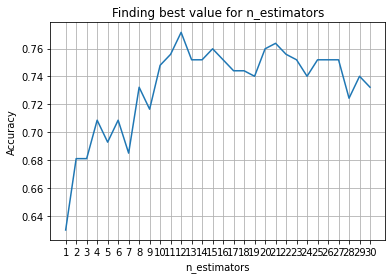

Highest value:  0.7716535433070866


In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 12, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
print("**** KNN ****")
knn_predictions = knn.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,knn_predictions)))
print("Precision Score =",format(metrics.precision_score(y_test,knn_predictions)))
print("Recall Score =", format(metrics.recall_score(y_test,knn_predictions)))
print("F1 Score =", format(metrics.f1_score(y_test,knn_predictions)))


**** KNN ****
Accuracy Score = 0.7716535433070866
Precision Score = 0.7575757575757576
Recall Score = 0.5434782608695652
F1 Score = 0.6329113924050633


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print("**** Naive Bayes ****")
predictions_nb = nb.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions_nb)))
print("Precision Score =",format(metrics.precision_score(y_test,predictions_nb)))
print("Recall Score =", format(metrics.recall_score(y_test,predictions_nb)))
print("F1 Score =", format(metrics.f1_score(y_test,predictions_nb)))

**** Naive Bayes ****
Accuracy Score = 0.7440944881889764
Precision Score = 0.6451612903225806
Recall Score = 0.6521739130434783
F1 Score = 0.6486486486486486


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)
print("**** Support Vector Machine ****")
predictions_svc = svc.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions_svc)))
print("Precision Score =",format(metrics.precision_score(y_test,predictions_svc)))
print("Recall Score =", format(metrics.recall_score(y_test,predictions_svc)))
print("F1 Score =", format(metrics.f1_score(y_test,predictions_svc)))

**** Support Vector Machine ****
Accuracy Score = 0.7834645669291339
Precision Score = 0.7534246575342466
Recall Score = 0.5978260869565217
F1 Score = 0.6666666666666666


In [ ]:
print("Decision tree: ", format(metrics.accuracy_score(y_test,predictions_dtree))
+"\nRandom Forest: ", format(metrics.accuracy_score(y_test,predictions_rfc))
+"\nLogistic Regression: "+ format(metrics.accuracy_score(y_test,predictions_logreg))
+"\nK Nearest neighbors: "+ format(metrics.accuracy_score(y_test,knn_predictions))
+"\nNaive Bayes: ", format(metrics.accuracy_score(y_test,predictions_nb))
+"\nSupport Vector Classifier: ", format(metrics.accuracy_score(y_test,predictions_svc)))

Decision tree:  0.7165354330708661
Random Forest:  0.9803149606299213
Logistic Regression: 0.7874015748031497
K Nearest neighbors: 0.7716535433070866
Naive Bayes:  0.7440944881889764
Support Vector Classifier:  0.7834645669291339


In [ ]:
rfc_model.feature_importances_

array([0.09125853, 0.26011977, 0.07934157, 0.05797975, 0.0574101 ,
       0.20466896, 0.11937311, 0.1298482 ])

<BarContainer object of 8 artists>

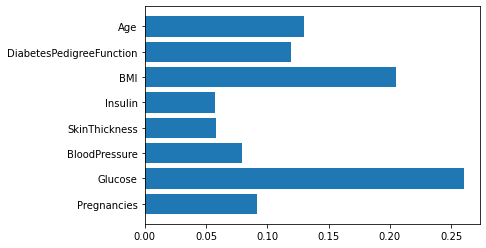

In [ ]:
plt.barh(X.columns,rfc_model.feature_importances_)

In [ ]:
rfc_model.predict([[10,101,76,48,180,32.9,0.171,63]])

array([0])

In [ ]:
pred=rfc_model.predict([[8,183,64,0,0,23.3,0.672,32]])
if pred==1:
  print("Person likely to have diabetes")
else:
  print("Person is not likely to have diabetes")

Person likely to have diabetes
